In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas_profiling as pp

In [74]:
data = pd.read_csv ('data_clean.csv')

In [75]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [76]:
data.shape

(158, 10)

In [77]:
data.size

1580

In [78]:
data.isna().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

In [79]:
data.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,158.000000,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,79.500000,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,45.754781,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,40.250000,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,79.500000,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,118.750000,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [80]:
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [81]:
data = data.iloc[:,1:]

In [82]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [83]:
data['Month']= pd.to_numeric(data['Month'],errors = 'coerce')
data['Temp C']  = pd.to_numeric(data['Temp C'],errors = 'coerce')
data ['Weather'] = data['Weather'].astype('category')
data.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp C      float64
Month       float64
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

In [84]:
data.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [85]:
data.shape

(158, 9)

In [86]:
data = data.drop_duplicates()
data.shape

(157, 9)

In [87]:
data = data.drop('Temp C',axis=1)

In [88]:
data

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [89]:
data = data.rename({'Solar.R': 'Solar'},axis=1)

In [90]:
data

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


<AxesSubplot:>

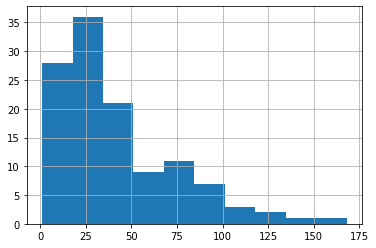

In [91]:
data.Ozone.hist()

In [92]:
data.Ozone.describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

<AxesSubplot:>

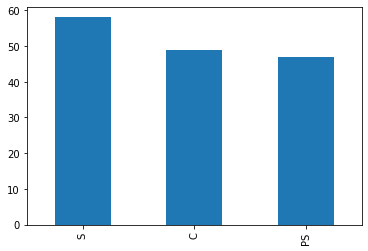

In [93]:
data.Weather.value_counts().plot.bar()

<AxesSubplot:>

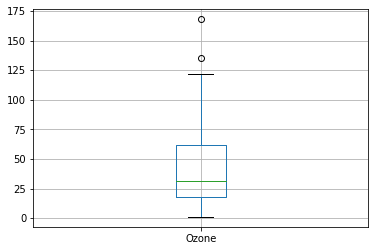

In [94]:
data.boxplot(column = 'Ozone')

In [95]:
data.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [96]:
mean= data.Ozone.mean()

In [97]:
data['Ozone']= data['Ozone'].fillna(mean)

In [98]:
data.isna().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [99]:
mode =data.Weather.mode()

In [105]:
data ['Weather']= data['Weather'].fillna(data['Weather'].mode().iloc[0])

In [107]:
data = data.dropna()


In [108]:
data.isna().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [109]:
data.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.307535,-0.528599,0.114010,-0.013309,NaN,0.628875
Solar,0.307535,1.000000,-0.053553,-0.094012,-0.150440,NaN,0.264497
Wind,-0.528599,-0.053553,1.000000,-0.150014,0.025057,NaN,-0.433486
Month,0.114010,-0.094012,-0.150014,1.000000,0.053499,NaN,0.357062
Day,-0.013309,-0.150440,0.025057,0.053499,1.000000,NaN,-0.114030
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.628875,0.264497,-0.433486,0.357062,-0.114030,NaN,1.000000
